# 背景介绍,需求

## 目的---我们要喜欢从数据中挖掘有用的价值,比如客户用户价值,客户分类,来帮助销售人员更好针对不同客户群体进行精准销售



## 数据来源--我们组员公司的真实数据

## 数据的介绍

# 数据准备

## 读取数据

In [49]:
import warnings
warnings.filterwarnings("ignore")
import datetime 
import pandas as pd

In [50]:
df = pd.read_excel('./data/2019.xlsx')

## 查看数据

In [51]:
df.head(2)

,销售团队,TEAMNAME,GCN/GHK,DOCTYP,发票日期,合同号,CUSTOMER,DISTRICT,TERRITORY,PROVINCE,...,INDDES,ITEM,QTY,不含税单价,DIV,BU,PH,SERIES,PERIOD,YR
0,SS,Sales South,GCN,OEIN,2019-07-19,SC20192033259,1004198,SS,SOUTH,广东,...,Packaging machines,1005784,4,753.23,2,1,02010371COLMIR,COLMIR,7,2019
1,SS,Sales South,GCN,OEIN,2019-07-10,SC20192033260,1004198,SS,SOUTH,广东,...,Packaging machines,1005784,4,753.23,2,1,02010371COLMIR,COLMIR,7,2019


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31670 entries, 0 to 31669
Data columns (total 29 columns):
销售团队         31670 non-null object
TEAMNAME     31670 non-null object
GCN/GHK      31670 non-null object
DOCTYP       31670 non-null object
发票日期         31670 non-null object
合同号          31650 non-null object
CUSTOMER     31670 non-null object
DISTRICT     31670 non-null object
TERRITORY    31665 non-null object
PROVINCE     31670 non-null object
BPCTYP       31670 non-null object
CUSTYP       31670 non-null int64
TYPDES       31648 non-null object
CSC          31670 non-null object
SI           31670 non-null int64
SIDES        31670 non-null object
SUBGRP       31670 non-null object
GRPDES       31670 non-null object
IND          31670 non-null object
INDDES       31670 non-null object
ITEM         31670 non-null int64
QTY          31670 non-null int64
不含税单价        31670 non-null float64
DIV          31670 non-null int64
BU           31670 non-null int64
PH           31670 no

# 数据处理

## 数据清洗--把中文字段信息转换字符串

In [53]:
df.PROVINCE.unique()

array(['广东', '天津', '山东', '辽宁', '江苏', '黑龙江', '吉林', '福建', '安徽', '北京', '湖南',
       '上海', '重庆', '山西', '四川', '江西', '浙江', '湖北', '河北', '陕西', '广西', '内蒙古',
       '云南', '宁夏', '甘肃', '河南', 'GERMANY', 'ITALY', 'TAIWAN', 'SINGAPORE',
       'HONG KONG', '香港', '广东省', '江苏省'], dtype=object)

In [54]:
df = df.replace('广东省','广东').replace('江苏省','江苏').replace('HONG KONG','香港')

In [55]:
df.PROVINCE.unique()

array(['广东', '天津', '山东', '辽宁', '江苏', '黑龙江', '吉林', '福建', '安徽', '北京', '湖南',
       '上海', '重庆', '山西', '四川', '江西', '浙江', '湖北', '河北', '陕西', '广西', '内蒙古',
       '云南', '宁夏', '甘肃', '河南', 'GERMANY', 'ITALY', 'TAIWAN', 'SINGAPORE',
       '香港'], dtype=object)

In [56]:
from Utilities.utility import province_to_short
df['PROVINCE'] = df['PROVINCE'].apply(lambda x: province_to_short(x))

In [57]:
df['PROVINCE'].unique()

array(['GD', 'TJ', 'SD', 'LN', 'JS', 'HLJ', 'JL', 'BJ', 'HN', 'SH', 'CQ',
       'SX', 'SC', 'JX', 'ZJ', 'HUB', 'HEB', 'XX', 'GX', 'NMG', 'YN',
       'LX', 'GS', 'HEN', 'DE', 'IT', 'TW', 'SG', 'HK'], dtype=object)

## PROVINCE/Territory地区字段分清楚,比如Germany地区被标记为EAST,而上海也标记为EAST

## 把中文字段变成英文字段

In [58]:
df.columns

Index(['销售团队', 'TEAMNAME', 'GCN/GHK', 'DOCTYP', '发票日期', '合同号', 'CUSTOMER',
       'DISTRICT', 'TERRITORY', 'PROVINCE', 'BPCTYP', 'CUSTYP', 'TYPDES',
       'CSC', 'SI', 'SIDES', 'SUBGRP', 'GRPDES', 'IND', 'INDDES', 'ITEM',
       'QTY', '不含税单价', 'DIV', 'BU', 'PH', 'SERIES', 'PERIOD', 'YR'],
      dtype='object')

In [59]:
df = df.rename(columns={"销售团队": "Sales_TEAM", "发票日期": "Invoice_date", "合同号": "Contract_NO","不含税单价":"price"})

In [60]:
df.head(2)

,Sales_TEAM,TEAMNAME,GCN/GHK,DOCTYP,Invoice_date,Contract_NO,CUSTOMER,DISTRICT,TERRITORY,PROVINCE,...,INDDES,ITEM,QTY,price,DIV,BU,PH,SERIES,PERIOD,YR
0,SS,Sales South,GCN,OEIN,2019-07-19,SC20192033259,1004198,SS,SOUTH,GD,...,Packaging machines,1005784,4,753.23,2,1,02010371COLMIR,COLMIR,7,2019
1,SS,Sales South,GCN,OEIN,2019-07-10,SC20192033260,1004198,SS,SOUTH,GD,...,Packaging machines,1005784,4,753.23,2,1,02010371COLMIR,COLMIR,7,2019


## 缺失值处理 - 因为数据量还是比较大,暂时dropna方法去掉

In [61]:
df.dropna(inplace=True)

## 单变量分析

## 变量关联分析

## 选择需要的字段

In [62]:
df.columns

Index(['Sales_TEAM', 'TEAMNAME', 'GCN/GHK', 'DOCTYP', 'Invoice_date',
       'Contract_NO', 'CUSTOMER', 'DISTRICT', 'TERRITORY', 'PROVINCE',
       'BPCTYP', 'CUSTYP', 'TYPDES', 'CSC', 'SI', 'SIDES', 'SUBGRP', 'GRPDES',
       'IND', 'INDDES', 'ITEM', 'QTY', 'price', 'DIV', 'BU', 'PH', 'SERIES',
       'PERIOD', 'YR'],
      dtype='object')

In [63]:
df_new = df[['Invoice_date','CUSTOMER','PROVINCE','CUSTYP', 'TYPDES', 'ITEM', 'QTY', 'price','PERIOD']]

In [64]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31623 entries, 0 to 31669
Data columns (total 9 columns):
Invoice_date    31623 non-null object
CUSTOMER        31623 non-null object
PROVINCE        31623 non-null object
CUSTYP          31623 non-null int64
TYPDES          31623 non-null object
ITEM            31623 non-null int64
QTY             31623 non-null int64
price           31623 non-null float64
PERIOD          31623 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 2.4+ MB


# 特征工程

## RFM模型定义--通过一个客户的近期购买行为、购买的总体频率以及花了多少钱3项指标来描述该客户的价值状况。

In [65]:
df_new['paytime'] = pd.to_datetime(df_new['Invoice_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d')))
df_new.head()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31623 entries, 0 to 31669
Data columns (total 10 columns):
Invoice_date    31623 non-null object
CUSTOMER        31623 non-null object
PROVINCE        31623 non-null object
CUSTYP          31623 non-null int64
TYPDES          31623 non-null object
ITEM            31623 non-null int64
QTY             31623 non-null int64
price           31623 non-null float64
PERIOD          31623 non-null int64
paytime         31623 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 2.7+ MB


## 创建3个新的变量 (Recency,Frequency,Monetary)

## Recency--用户最近一次下订单的时间间隔，衡量用户是否存在流失可能性

In [66]:
# 提取每个用户最近（最大）的购买日期
data_r = df_new.groupby('CUSTOMER')['paytime'].max().reset_index()
# 与当前日期相减，取得最近一次购买距当前的天数。
data_r['recency'] = data_r['paytime'].apply(lambda x:(pd.to_datetime('2020-01-01')-x).days)
# 两个日期相减，得到的数据类型是timedelta类型，要进行数值计算，需要提取出天数数字。
data_r.drop('paytime',axis = 1,inplace = True)
data_r.head()

,CUSTOMER,recency
0,1000022,35
1,1000023,43
2,1000025,348
3,1000026,6
4,1000033,15


## Frequency--用户最近一段时间内累计消费频次，衡量用户的粘性

In [67]:
#to do , 可以再细致一点,比如根据item进行深化分析

In [68]:
# 分组聚合，得到每个用户发生于不同日期的购买次数
data_f = df_new.groupby(['CUSTOMER','paytime'])['Invoice_date'].count().reset_index()
data_f = data_f.groupby('CUSTOMER')['paytime'].count().reset_index()
# 修改列名
data_f.rename({'paytime':'frequence'},axis = 1,inplace = True)
data_f.head()

,CUSTOMER,frequence
0,1000022,7
1,1000023,6
2,1000025,1
3,1000026,25
4,1000033,7


## M（Money)： 用户最近一段时间内累计消费金额，衡量用户的消费能力和忠诚度

In [69]:
df_new['sales']=df_new["QTY"]*df_new["price"]

In [70]:
data_m = df_new.groupby('CUSTOMER')['sales'].sum().reset_index()
data_m['money'] = data_m['sales']/data_f['frequence']
data_m.drop('sales',axis = 1,inplace = True)
data_m.head()

,CUSTOMER,money
0,1000022,22832.154286
1,1000023,80435.956667
2,1000025,580.000000
3,1000026,6817.014000
4,1000033,23637.768571


In [71]:
data_rf = pd.merge(data_r,data_f,on = 'CUSTOMER',how = 'inner')
data_rf.head()
data_rfm = pd.merge(data_rf,data_m, on = 'CUSTOMER',how = 'inner')
data_rfm

,CUSTOMER,recency,frequence,money
0,1000022,35,7,22832.154286
1,1000023,43,6,80435.956667
2,1000025,348,1,580.000000
3,1000026,6,25,6817.014000
4,1000033,15,7,23637.768571
...,...,...,...,...
1546,ZEA00000101R,58,1,1422.260000
1547,ZEA00000132R,78,9,120439.152222
1548,ZEA00000149R,15,66,18608.477273
1549,ZGA00000005R,82,6,14356.415000


## 查看数据分布特征

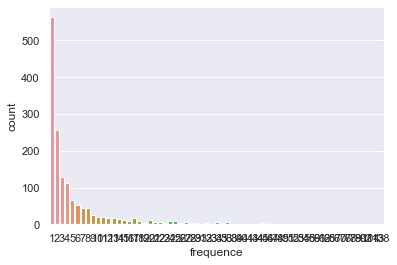

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6,4))
sns.set(style = 'darkgrid')
sns.countplot(data_rfm['frequence'])

Text(0.5, 1.0, 'recency distribution')

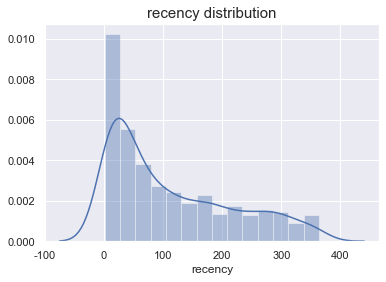

In [73]:
sns.distplot(data_rfm['recency'])
plt.title('recency distribution',fontsize = 15)

Text(0.5, 1.0, 'money distritbution')

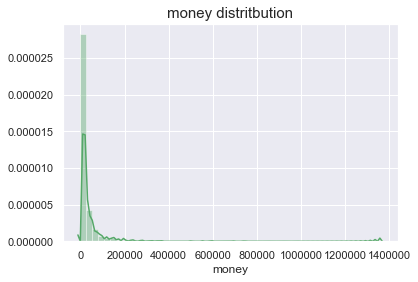

In [74]:
sns.distplot(data_rfm['money'],color = 'g')
plt.title('money distritbution',fontsize = 15)

## 对离散值进行one-hot处理


In [75]:
df_one_hot = df_new[['CUSTOMER','PROVINCE','CUSTYP', 'TYPDES', 'ITEM','PERIOD']]

In [76]:
df_one_hot = pd.get_dummies(df_one_hot,columns=['PROVINCE','CUSTYP', 'TYPDES', 'ITEM','PERIOD'])

In [77]:
df_one_hot = df_one_hot.groupby("CUSTOMER").sum().reset_index()
# df_one_hot= df_one_hot/data_f['frequence']
# data_f['frequence']
df_all_new_features = pd.merge(data_rfm,df_one_hot, on = 'CUSTOMER',how = 'inner')
df_all_new_features

,CUSTOMER,recency,frequence,money,PROVINCE_BJ,PROVINCE_CQ,PROVINCE_DE,PROVINCE_GD,PROVINCE_GS,PROVINCE_GX,...,PERIOD_3,PERIOD_4,PERIOD_5,PERIOD_6,PERIOD_7,PERIOD_8,PERIOD_9,PERIOD_10,PERIOD_11,PERIOD_12
0,1000022,35,7,22832.154286,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,4.0,2.0,0.0,2.0,11.0,0.0
1,1000023,43,6,80435.956667,0.0,0.0,0.0,27.0,0.0,0.0,...,0.0,3.0,0.0,0.0,7.0,0.0,5.0,0.0,12.0,0.0
2,1000025,348,1,580.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000026,6,25,6817.014000,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,13.0,1.0,2.0,6.0,3.0,13.0,0.0,4.0,3.0
4,1000033,15,7,23637.768571,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,1.0,0.0,5.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,ZEA00000101R,58,1,1422.260000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1547,ZEA00000132R,78,9,120439.152222,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,10.0,1.0,2.0,5.0,0.0,7.0,0.0,0.0
1548,ZEA00000149R,15,66,18608.477273,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,9.0,12.0,5.0,21.0,11.0,15.0,20.0,11.0,13.0
1549,ZGA00000005R,82,6,14356.415000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0


## 对连续性数值进行标准化比如Zscore

In [78]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
data_rfm = df_all_new_features.copy()
min_max_scaler = preprocessing.MinMaxScaler()
data_rfm_s = min_max_scaler.fit_transform(df_all_new_features.iloc[:,1:])
data_rfm_s

array([[0.09366391, 0.04379562, 0.01755794, ..., 0.01587302, 0.18333333,
        0.        ],
       [0.11570248, 0.03649635, 0.0599676 , ..., 0.        , 0.2       ,
        0.        ],
       [0.95592287, 0.        , 0.00117523, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03856749, 0.47445255, 0.01444834, ..., 0.15873016, 0.18333333,
        0.06878307],
       [0.2231405 , 0.03649635, 0.01131784, ..., 0.03174603, 0.        ,
        0.        ],
       [1.        , 0.        , 0.00122029, ..., 0.        , 0.        ,
        0.        ]])

# 建立模型

## 选择合适的cluster个数

[53.945310032329964, 51.91411338255942, 43.860122420662506, 42.41809351790321, 43.903200284989865, 41.45611890259749, 35.27631306872337] [0.6874174740982252, 0.023052703475159846, 0.02412893839971681, 0.02483475582568969, 0.030439290966806073, 0.03556036798257376, 0.029469410075866134] [2820.3157751822914, 2735.086697054756, 2689.7579413582575, 2629.90557255941, 2555.453052180852, 2513.5979153816193, 2515.9029596219234]


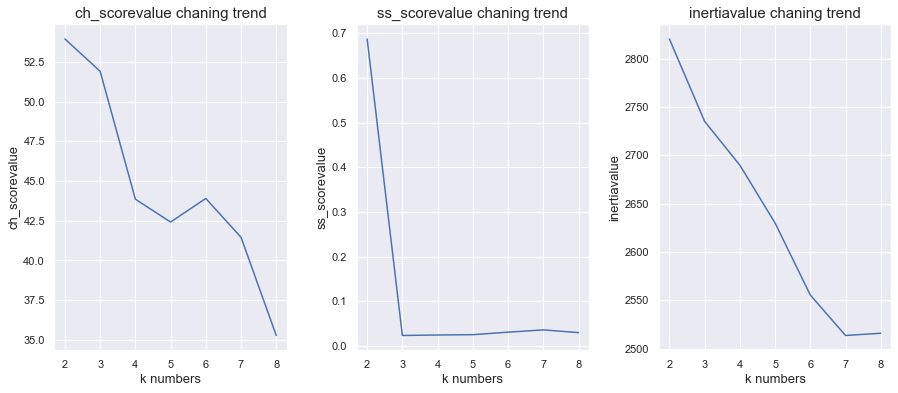

In [79]:
inertia = []
ch_score = []
ss_score = []
for k in range(2,9):
    model = KMeans(n_clusters = k, init = 'k-means++',max_iter = 500)
    model.fit(data_rfm_s)
    pre = model.predict(data_rfm_s)
    ch = metrics.calinski_harabaz_score(data_rfm_s,pre) 
    ss = metrics.silhouette_score(data_rfm_s,pre)
    inertia.append(model.inertia_)
    ch_score.append(ch)
    ss_score.append(ss)
print(ch_score,ss_score,inertia)

score = pd.Series([ch_score,ss_score,inertia],index = ['ch_score','ss_score','inertia'])
aa = score.index.tolist()
plt.figure(figsize = (15,6))
j = 1
for i in aa:
    plt.subplot(1,3,j)
    plt.plot(list(range(2,9)),score[i])
    plt.xlabel('k numbers',fontsize = 13)
    plt.ylabel(f'{i}value',fontsize = 13)
    plt.title(f'{i}value chaning trend',fontsize = 15)
    j+=1
plt.subplots_adjust(wspace = 0.3)

In [80]:
model = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 500)
model.fit(data_rfm_s)
ppre = model.predict(data_rfm_s)
ppre
ppre = pd.DataFrame(ppre)
data = pd.concat([df_all_new_features,ppre],axis = 1)
data.rename({0:u'cluster'},axis = 1,inplace = True)
data

,CUSTOMER,recency,frequence,money,PROVINCE_BJ,PROVINCE_CQ,PROVINCE_DE,PROVINCE_GD,PROVINCE_GS,PROVINCE_GX,...,PERIOD_4,PERIOD_5,PERIOD_6,PERIOD_7,PERIOD_8,PERIOD_9,PERIOD_10,PERIOD_11,PERIOD_12,cluster
0,1000022,35,7,22832.154286,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,4.0,2.0,0.0,2.0,11.0,0.0,0
1,1000023,43,6,80435.956667,0.0,0.0,0.0,27.0,0.0,0.0,...,3.0,0.0,0.0,7.0,0.0,5.0,0.0,12.0,0.0,0
2,1000025,348,1,580.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1000026,6,25,6817.014000,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,1.0,2.0,6.0,3.0,13.0,0.0,4.0,3.0,0
4,1000033,15,7,23637.768571,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,1.0,0.0,5.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,ZEA00000101R,58,1,1422.260000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1547,ZEA00000132R,78,9,120439.152222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,1.0,2.0,5.0,0.0,7.0,0.0,0.0,0
1548,ZEA00000149R,15,66,18608.477273,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,12.0,5.0,21.0,11.0,15.0,20.0,11.0,13.0,0
1549,ZGA00000005R,82,6,14356.415000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0


In [81]:
customer = pd.merge(data[['CUSTOMER','cluster']],df_new, on = 'CUSTOMER',how = 'inner')

# 基于聚类分类,使用协同过滤算法进行产品推荐给不同客户

In [82]:
cluster_0 = customer[customer["cluster"]==0][['CUSTOMER','ITEM','QTY']]
cluster_0.groupby(['CUSTOMER','ITEM']).sum().to_csv('./data/cluster_0.csv')

In [83]:
#!/usr/bin/env python
# encoding: utf-8

# cluster_0_dummy_1.to_csv('./data/cluster_0_dummy_1.csv')
file = open("./data/cluster_0.csv",'r', encoding='UTF-8')#记得读取文件时加‘r’， encoding='UTF-8'
##读取data.csv中每行中除了名字的数据
data = {}##存放每位用户
for line in file.readlines()[1:]:
    #注意这里不是readline()
    line = line.strip().split(',')
    #如果字典中没有某位用户，则使用用户ID来创建这位用户
    if not line[0] in data.keys():
        data[line[0]] = {line[1]:line[2]}
    #否则直接添加以该用户ID为key字典中
    else:
        data[line[0]][line[1]] = line[2]
 
# print(data)
 
 
"""计算任何两位用户之间的相似度，由于每位用户购买数量，所以兽先要找到两位用户共同购买过的产品
       然后计算两者之间的欧式距离，最后算出两者之间的相似度
"""
from math import *
def Euclidean(user1,user2):
    #取出两位用户评论过的电影和评分
    user1_data=data[user1]
    user2_data=data[user2]
    distance = 0
    #找到两位用户都，并计算欧式距离
    for key in user1_data.keys():
        if key in user2_data.keys():
            #注意，distance越大表示两者越相似
            distance += pow(float(user1_data[key])-float(user2_data[key]),2)
 
    return 1/(1+sqrt(distance))#这里返回值越小，相似度越大
 
#计算某个用户与其他用户的相似度
def top10_simliar(userID):
    res = []
    for userid in data.keys():
        #排除与自己计算相似度
        if not userid == userID:
            simliar = Euclidean(userID,userid)
            res.append((userid,simliar))
    res.sort(key=lambda val:val[1])
    return res[:10]
 
RES = top10_simliar('1000022')
print(RES)

{'1000022': {'1044255': '1', '1044338': '1', '1044680': '4', '1060063': '20', '1060064': '14', '1076398': '4', '1212049': '1', '1212050': '1', '2033415': '4', '2033416': '4', '2067169': '1', '2074797': '4', '5311684': '8', '6025622': '8'}, '1000023': {'1024445': '2', '1047717': '2', '1090047': '7', '1102165': '1', '1212028': '1', '1212029': '1', '1212033': '1', '1212034': '1', '1212037': '9', '1212038': '9', '1212060': '2', '1212061': '2', '2027726': '2', '2028369': '1', '2067169': '15', '2074406': '7', '2074407': '2', '2102275': '1', '6035129': '1', '6054121': '3'}, '1000026': {'1019973': '1', '1060058': '61', '1060847': '50', '1061172': '4', '1061173': '4', '1061176': '5', '1061177': '5', '1061178': '5', '1061179': '5', '1070646': '2', '1070647': '2', '1078498': '7', '1207652': '2', '1212017': '2', '1212019': '2', '1212053': '1', '1212071': '1', '1213763': '1', '1213764': '1', '2020204': '1', '2067169': '1', '2099265': '4', '5307083': '2', '5307084': '5', '6023140': '7', '6025470': '

In [48]:
# sorted(RES,key=lambda x:(x[1],x[0].lower()),reverse=True)

In [90]:
########################################################################
#根据用户推荐产品给其他人
def recommend(user):
    #相似度最高的用户
    top_sim_user = top10_simliar(user)[0][0]
    print(top_sim_user)
    #相似度最高的用户的产品记录
    items = data[top_sim_user]
    recommendations = []
    #筛选出该用户未购买的产品并添加到列表中
    for item in items.keys():
        if item not in data[user].keys():
            recommendations.append((item,items[item]))
    recommendations.sort(key=lambda val:(val[0],val[1]),reverse=False)#按照购买数量排序
    #返回评分最高的10个产品
    return recommendations[:10]
 
Recommendations = recommend('1000022')
print(Recommendations)

HK000000580H
[('1016296', '22'), ('1044339', '12'), ('1044627', '135'), ('1044630', '137'), ('1060058', '272'), ('5312082', '45'), ('5312084', '27'), ('6023135', '10'), ('6025640', '10'), ('6035417', '27')]


In [1]:
message = 'K_value = 3, max_iter_eps = 500'

In [6]:
tuple(message.split(sep=','))

('K_value = 3', ' max_iter_eps = 500')